In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
deliveries = pd.read_csv('Ipl Data/deliveries.csv')
matches=pd.read_csv("Ipl Data/matches.csv")

In [3]:
#Data Cleaning
#Replacing duplicate team name
matches=matches.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
matches=matches.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
matches=matches.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad") 
deliveries=deliveries.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
deliveries=deliveries.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
deliveries=deliveries.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad") 

#Filling Null values in winner column
matches['winner'] = matches['winner'].fillna("No Result")

#Merging similar name of stadiums into one
matches=matches.replace(to_replace ="MA Chidambaram Stadium, Chepauk", value ="M. A. Chidambaram Stadium") 
matches=matches.replace(to_replace ="Punjab Cricket Association IS Bindra Stadium, Mohali", value ="Punjab Cricket Association Stadium, Mohali") 
matches=matches.replace(to_replace ="M. Chinnaswamy Stadium", value ="M Chinnaswamy Stadium") 
matches=matches.replace(to_replace ="ACA-VDCA Stadium", value ="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium") 
matches=matches.replace(to_replace ="Rajiv Gandhi International Stadium, Uppal", value ="Rajiv Gandhi Intl. Cricket Stadium") 

In [4]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


Sunrisers Hyderabad
[209, 214, 184, 190, 198, 196, 178, 205, 201, 208, 209, 233]


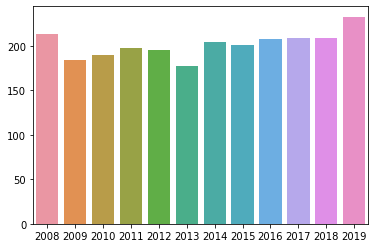

Royal Challengers Bangalore
[213, 181, 176, 204, 205, 215, 263, 190, 235, 248, 222, 219]


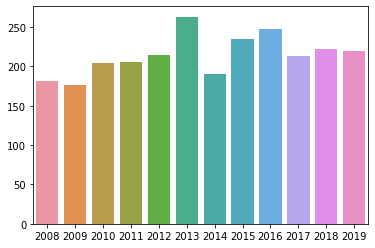

Mumbai Indians
[223, 202, 187, 218, 182, 197, 209, 195, 209, 206, 230, 210]


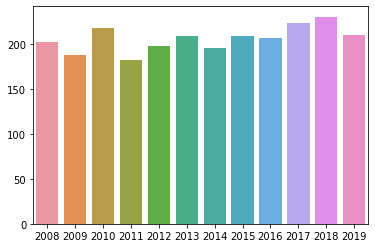

Rising Pune Supergiants
[187, nan, nan, nan, nan, nan, nan, nan, nan, 195, nan, nan]


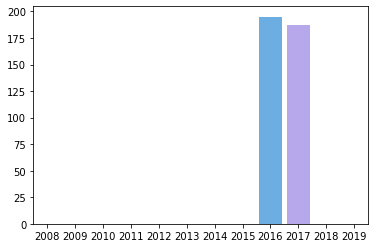

Gujarat Lions
[208, nan, nan, nan, nan, nan, nan, nan, nan, 196, nan, nan]


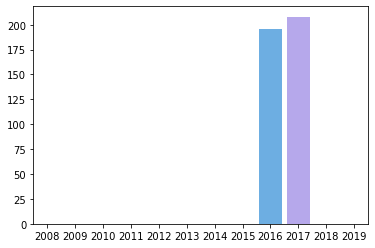

Kolkata Knight Riders
[187, 222, 189, 200, 175, 192, 186, 200, 190, 189, 250, 241]


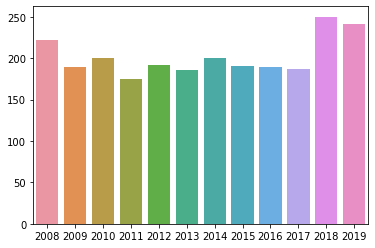

Kings XI Punjab
[230, 221, 174, 204, 232, 194, 194, 231, 191, 181, 221, 204]


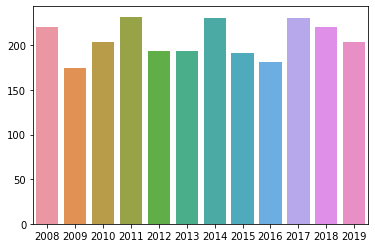

Delhi Capitals
[214, 194, 189, 188, 231, 207, 179, 180, 190, 192, 223, 219]


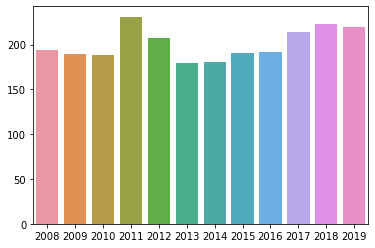

Chennai Super Kings
[nan, 240, 188, 246, 205, 222, 223, 205, 209, nan, 218, 186]


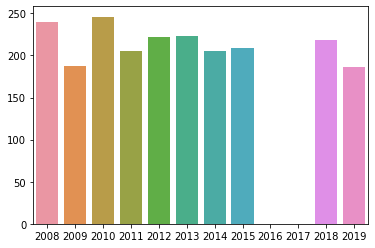

Rajasthan Royals
[nan, 217, 211, 223, 159, 197, 185, 201, 199, nan, 231, 203]


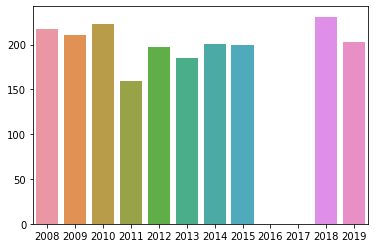

Kochi Tuskers Kerala
[nan, nan, nan, nan, 184, nan, nan, nan, nan, nan, nan, nan]


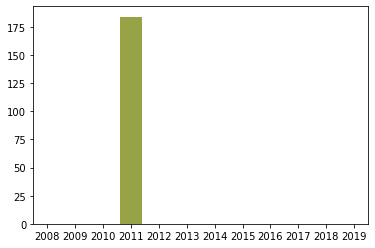

Pune Warriors
[nan, nan, nan, nan, 187, 192, 185, nan, nan, nan, nan, nan]


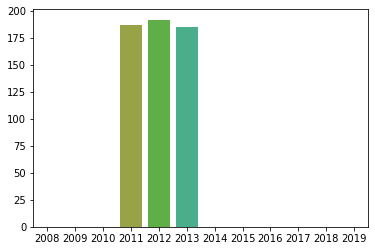

In [5]:
# Highest Run scored by each team in an inning in each season

match = []
inning = []
bat_team = []
bowl_team = []
runs = []
for mat in deliveries['match_id'].unique():
    for inn in deliveries[ deliveries['match_id']==mat ]['inning'].unique():
        df_tmp = deliveries[
                        (deliveries['match_id']==mat) &
                        (deliveries['inning']==inn)
        ]
        total_runs = df_tmp['total_runs'].sum()
        runs.append(total_runs)
        match.append(mat)
        inning.append(inn)
        bat_team.append(df_tmp['batting_team'].unique()[0])
        bowl_team.append(df_tmp['bowling_team'].unique()[0])
        
df_runs = pd.DataFrame()
df_runs['match_id'] = match
df_runs['inning'] = inning
df_runs['bat_team'] = bat_team
df_runs['bowl_team'] = bowl_team
df_runs['total_runs'] = runs
df_runs['season'] = [matches[ matches['id']==i ]['season'].unique()[0] for i in match] 

for team in df_runs['bat_team'].unique():
    max_runs = []
    for year in df_runs['season'].unique():
        max_run = df_runs[
                    (df_runs['bat_team']==team) &
                    (df_runs['season']==year)
        ]['total_runs'].max()
        max_runs.append(max_run)
    print(team)
    print(max_runs)
    sns.barplot(df_runs['season'].unique(), max_runs)
    plt.show()


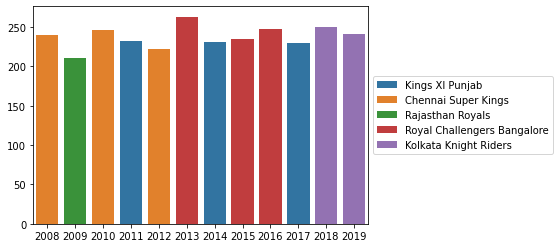

In [6]:
# Which Team Scored Hightest Total in each season

season = []
team_id = []
max_runs = []
for year in df_runs['season'].unique():
    max_run = df_runs[ df_runs['season']==year ]['total_runs'].max()
    team = df_runs[ (df_runs['season']==year) & (df_runs['total_runs']==max_run) ]['bat_team'].unique()[0]
    season.append(year)
    team_id.append(team)
    max_runs.append(max_run)

ax = sns.barplot(x = season, y = max_runs, hue = team_id, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
plt.show()

In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
deliveries['season'] = [matches[ matches['id']==i ]['season'].unique()[0] for i in deliveries['match_id']]
deliveries['stadium'] = [matches[ matches['id']==i ]['venue'].unique()[0] for i in deliveries['match_id']]

In [10]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong,NaN


In [11]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,stadium
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Rajiv Gandhi Intl. Cricket Stadium
